# Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore

# Loading the data

In [7]:
# Reading and viewing the dataset using Pandas
df = pd.read_csv('House_price.csv')
df

,Lot Size,Square Footage,Bedrooms,Bathrooms,Year Built,Neighborhood,House Type,Condition,Price
0,8270,2427,4,3,1917,Countryside,Villa,Average,392755
1,1860,4304,2,2,1954,Coastal,Detached,New,514408
2,6390,4202,4,3,1928,Countryside,Detached,Good,535696
3,6191,2856,3,1,1923,Downtown,Townhouse,Good,394831
4,6734,2835,5,3,1973,Suburb,Detached,New,431712
...,...,...,...,...,...,...,...,...,...
1495,2560,4714,3,2,1915,Countryside,Apartment,Good,598176
1496,2266,3727,1,2,1958,Downtown,Villa,Average,452760
1497,4638,3331,4,3,1980,Coastal,Villa,Old,461156
1498,9941,4258,3,1,2014,Suburb,Detached,Old,507455


# Viewing dataframe summary

In [9]:
df.head()

,Lot Size,Square Footage,Bedrooms,Bathrooms,Year Built,Neighborhood,House Type,Condition,Price
0,8270,2427,4,3,1917,Countryside,Villa,Average,392755
1,1860,4304,2,2,1954,Coastal,Detached,New,514408
2,6390,4202,4,3,1928,Countryside,Detached,Good,535696
3,6191,2856,3,1,1923,Downtown,Townhouse,Good,394831
4,6734,2835,5,3,1973,Suburb,Detached,New,431712


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Size        1500 non-null   int64 
 1   Square Footage  1500 non-null   int64 
 2   Bedrooms        1500 non-null   int64 
 3   Bathrooms       1500 non-null   int64 
 4   Year Built      1500 non-null   int64 
 5   Neighborhood    1500 non-null   object
 6   House Type      1500 non-null   object
 7   Condition       1500 non-null   object
 8   Price           1500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 105.6+ KB


In [13]:
df.describe()

,Lot Size,Square Footage,Bedrooms,Bathrooms,Year Built,Price
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,5565.268000,2752.630667,3.004000,2.023333,1960.682667,385227.756667
std,2580.684255,1274.974843,1.419387,0.816027,35.271509,129518.158313
min,1001.000000,501.000000,1.000000,1.000000,1900.000000,110176.000000
25%,3350.500000,1642.500000,2.000000,1.000000,1930.000000,279030.000000
50%,5611.500000,2751.500000,3.000000,2.000000,1961.000000,383466.500000
75%,7881.250000,3865.250000,4.000000,3.000000,1991.000000,499386.250000
max,9996.000000,4999.000000,5.000000,3.000000,2022.000000,636089.000000


In [15]:
df.isnull().sum()

Lot Size          0
Square Footage    0
Bedrooms          0
Bathrooms         0
Year Built        0
Neighborhood      0
House Type        0
Condition         0
Price             0
dtype: int64

# Data Visualization

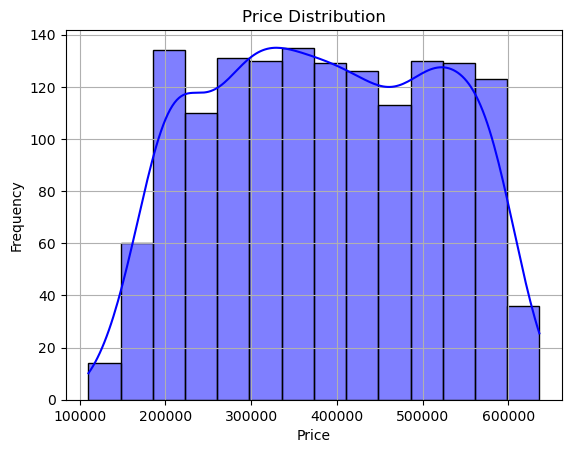

In [19]:
# Price Distribution
# Showing the distribution of "Price" feature
sns.histplot(df['Price'], kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Correlation Heatmap

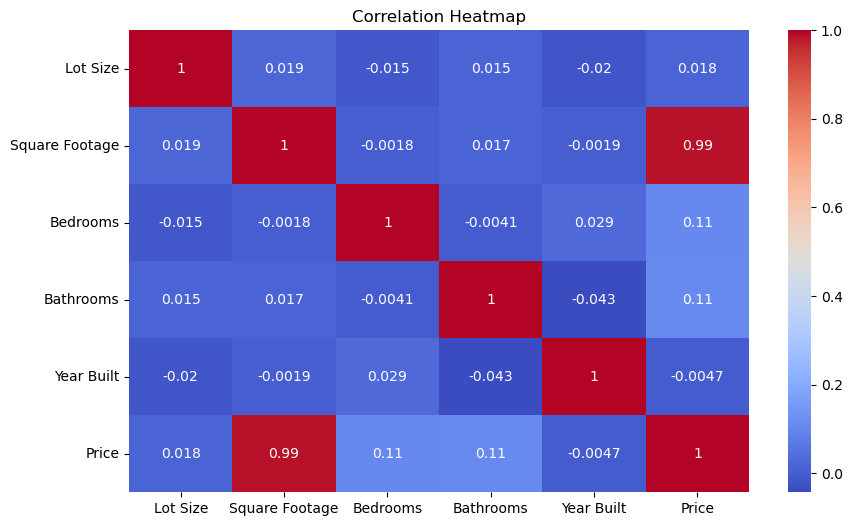

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

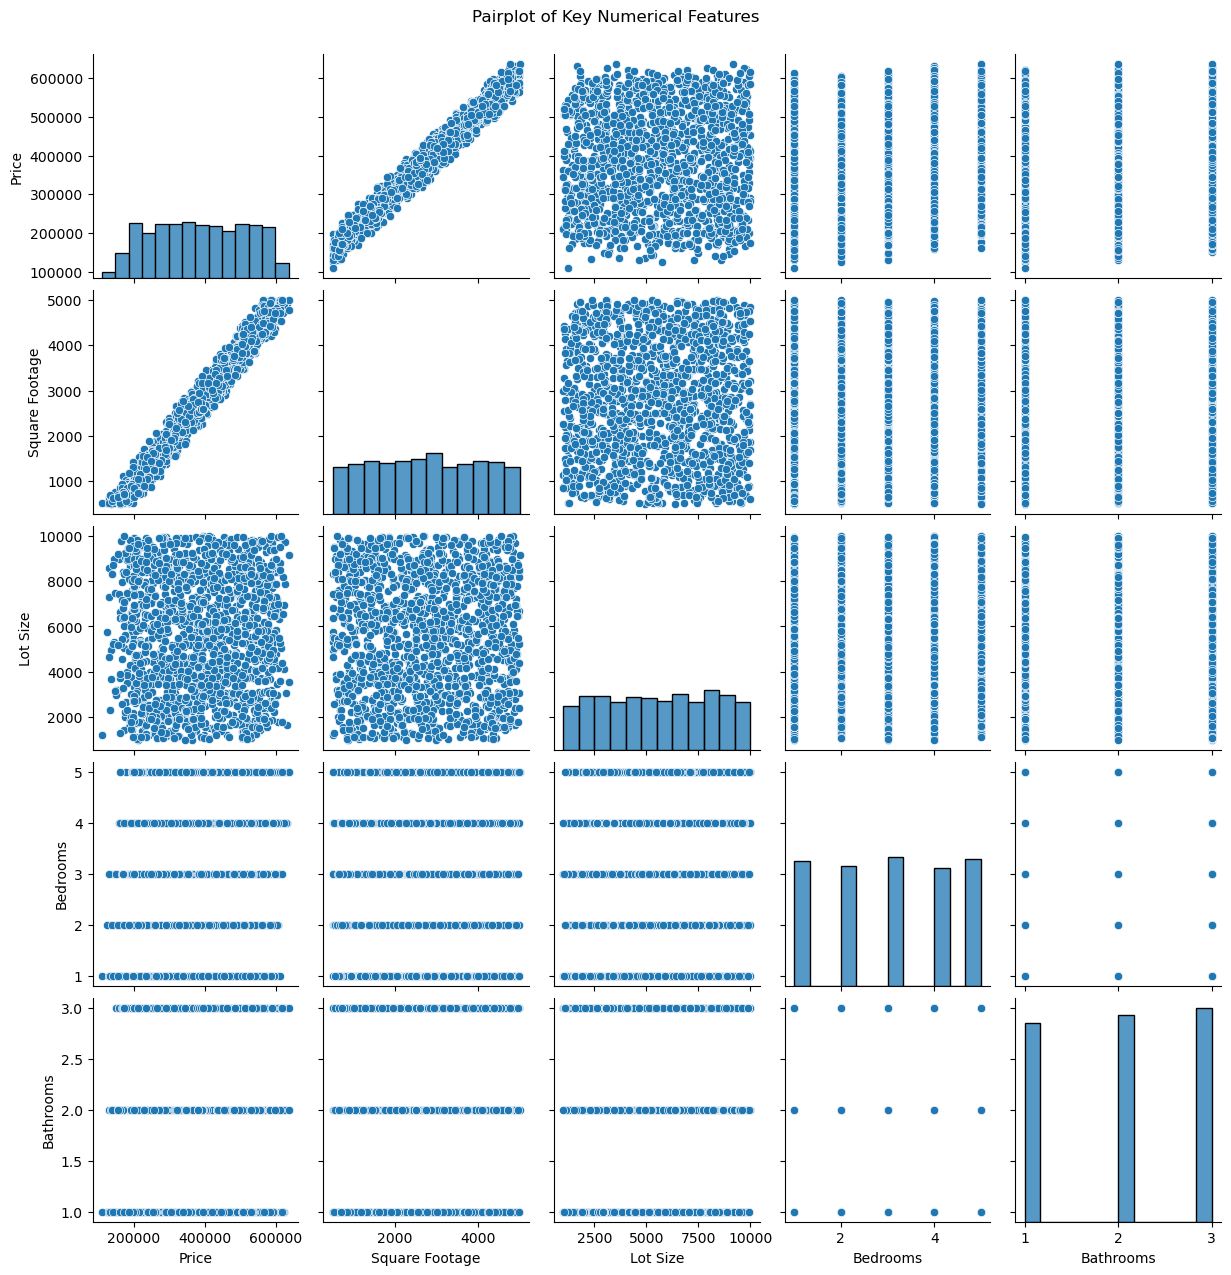

In [27]:
# Pairplot
sns.pairplot(df[['Price', 'Square Footage', 'Lot Size', 'Bedrooms', 'Bathrooms']])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

# Data Cleaning

In [31]:
numerical_cols = ['Price', 'Square Footage', 'Lot Size', 'Bedrooms', 'Bathrooms']
z_scores = np.abs(zscore(df[numerical_cols]))
df_clean = df[(z_scores < 3).all(axis=1)]

In [37]:
# Removing Outliers
print("Original dataset shape:", df.shape)
print(" Dataset shape after removing outliers (Z-score):", df_clean.shape)

Original dataset shape: (1500, 9)
 Dataset shape after removing outliers (Z-score): (1500, 9)


In [41]:
# Categorical Encoding (One-Hot Encoding)
# Convert categorical features into numerical form using one-hot encoding.
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Splitting Dataset into Training and Testing Sets

In [45]:
# Splitting the dataset into training (80%) and testing (20%) sets.
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of Training Features:", X_train.shape)
print("Shape of Testing Features:", X_test.shape)

Shape of Training Features: (1200, 14)
Shape of Testing Features: (300, 14)


# Model Training using Linear Regression

In [47]:
# Training a Linear Regression model using the training data.
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print("Model has been trained using Linear Regression.")

Model has been trained using Linear Regression.


# Model Evaluation - Linear Regression

In [49]:
# Testing the model and calculate R² Score and Mean Squared Error.
y_pred_lr = model_lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(" Linear Regression - Model Performance:")
print(f"R² Score: {r2_lr:.2f}")
print(f"Mean Squared Error: {mse_lr:.2f}")

 Linear Regression - Model Performance:
R² Score: 0.99
Mean Squared Error: 144051049.20


# Model Training using Decision Tree Regressor

In [51]:
# Another regression model trained for comparison.
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
print("Model has been trained using Decision Tree Regressor.")

Model has been trained using Decision Tree Regressor.


# Model Evaluation - Decision Tree

In [53]:
# Evaluating the Decision Tree model similarly to Linear Regression.
y_pred_dt = model_dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Regressor - Model Performance:")
print(f" R² Score: {r2_dt:.2f}")
print(f" Mean Squared Error: {mse_dt:.2f}")

Decision Tree Regressor - Model Performance:
 R² Score: 0.98
 Mean Squared Error: 346456120.58


# Conclusion

In [55]:
# Comparing both models' performance metrics.
print("Final Comparison:")
print(f"Linear Regression - R²: {r2_lr:.2f}, MSE: {mse_lr:.2f}")
print(f"Decision Tree Regressor - R²: {r2_dt:.2f}, MSE: {mse_dt:.2f}")

if r2_lr > r2_dt:
    print("Linear Regression performs better on this dataset.")
elif r2_dt > r2_lr:
    print(" Decision Tree Regressor performs better on this dataset.")
else:
    print(" Both models perform equally well. Consider further tuning.")

Final Comparison:
Linear Regression - R²: 0.99, MSE: 144051049.20
Decision Tree Regressor - R²: 0.98, MSE: 346456120.58
Linear Regression performs better on this dataset.


# Visual Comparison of Models

In [59]:
# Visualizing the performance of both models side by side.
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'R2 Score': [r2_lr, r2_dt],
    'MSE': [mse_lr, mse_dt]
})

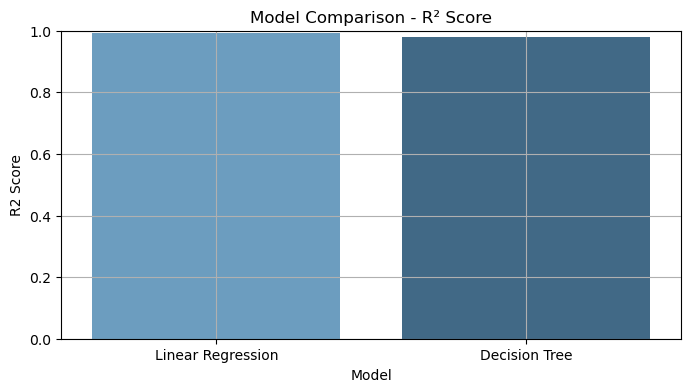

In [67]:
# Plotting R2 Score Comparison
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='R2 Score', data=metrics,hue='Model', palette='Blues_d',legend=False)
plt.title("Model Comparison - R² Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

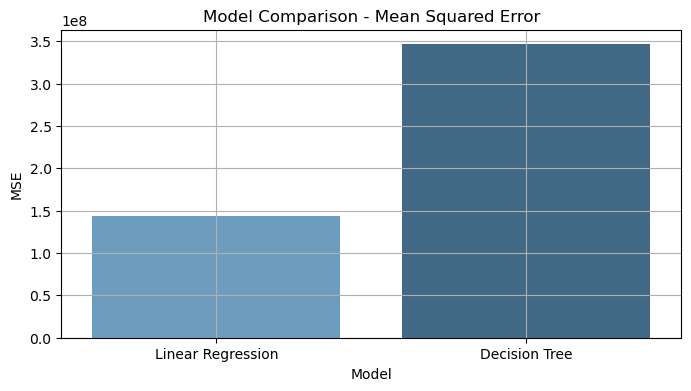

In [69]:
# Plotting MSE Comparison
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='MSE', data=metrics, hue='Model', palette='Blues_d',legend=False)
plt.title("Model Comparison - Mean Squared Error")
plt.grid(True)
plt.show()

# SUMMARY
Based on evaluation metrics, the model with the higher R² and lower MSE was chosen.
This project demonstrates a full ML pipeline for a regression problem, applicable to similar real-world use cases